# **Problem Statement**

**We want to predict whether a person has heart disease or not by building a Decision Tree model using the given data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.getcwd()

'c:\\Users\\olato\\machine-learning-intro\\notebooks'

In [2]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir("..")


In [3]:
df = pd.read_csv('.\data\heart-diease-dataset.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\olato\AppData\Local\Temp\ipykernel_35448\2146982549.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('.\data\heart-diease-dataset.csv')


In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# **Understanding data**


**Age:** Age of the patient.

**Sex:** Gender of the patient.

**Cp:** Chest pain level of the patient.

**trestbps:** Blood Pressure in the resting condition.

**chol:** Cholestrol Level of thee patient

**fbs:** Fasting Blood Sugar Level of the patient.

**restecg:** ECG(ElectroCardioGraphy) level at resting condition

**thalach:** Maximum Heart Rate Achieved during the test.

**exang:** Exercise Induce Angina( Facing any disscomfort or not).

**oldpeak:** How much ECG changes during exersise from resting.

**slope:** Slope of the ECG.

**ca(coronary artery):** The number of major blood vesseled coloured by fluroscopy

**thal(Thalasssemia):** A blood disorder that can damage your heart.

**target:** Whether a patient is having a heart disease or not (1 for Yes,0 for No )

In [ ]:
# EDA
df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# check target column for how many people have heart disase and how many do not?
df["target"].value_counts()

,count
target,
1,165
0,138


**1 means Yes Heart Disease- 165 patients has heart disease**

**0 means No Heart Diseas- 138 patients no heart disease**

In [ ]:
'''
Data Cleaning:

1) Check For Null Values

2) Check For The Duplicaate Records

3) Check For the Outliers
'''

'\nData Cleaning:\n\n1) Check For Null Values\n\n2) Check For The Duplicaate Records\n\n3) Check For the Outliers\n'

In [ ]:
# check for null values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


**No null values in dataset**

In [ ]:
# check for duplicates
df.duplicated().sum()


np.int64(1)

In [ ]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


**1 duplicate value**

**Duplicate value will be dropped**

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

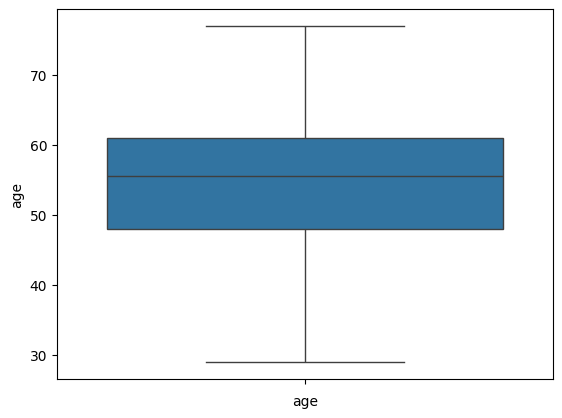

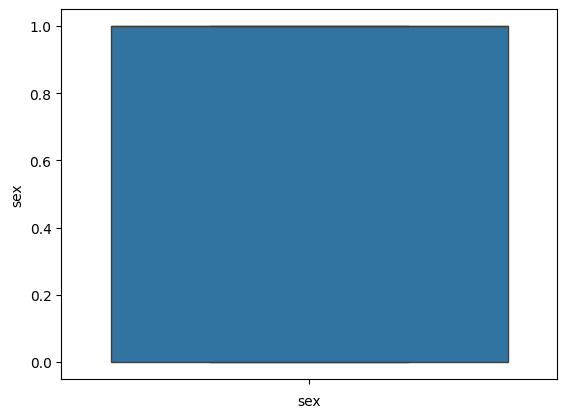

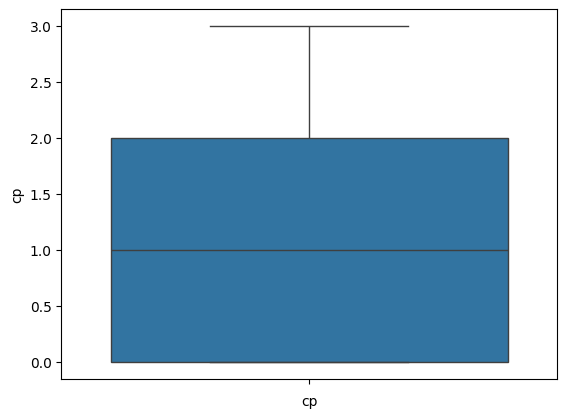

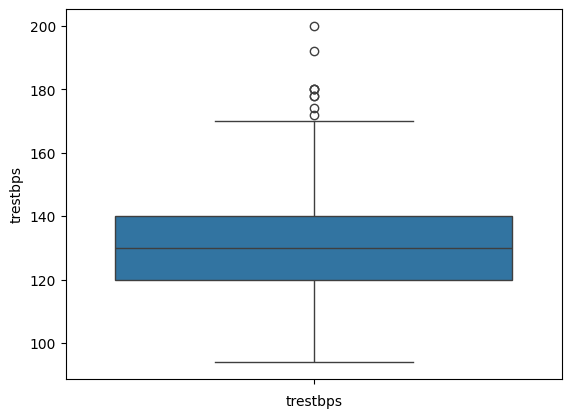

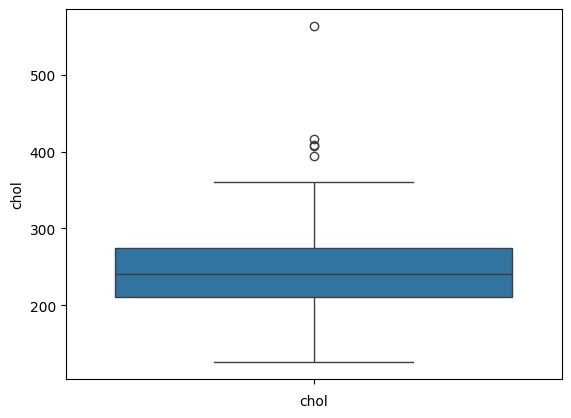

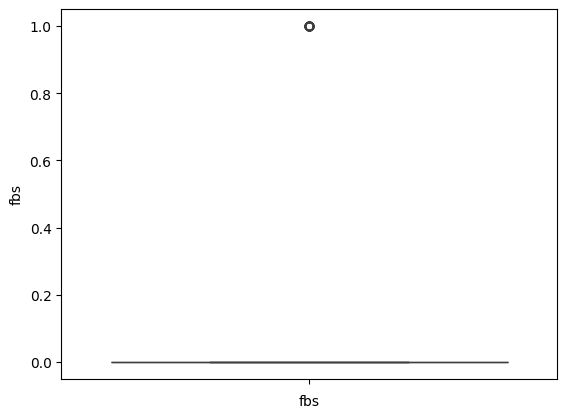

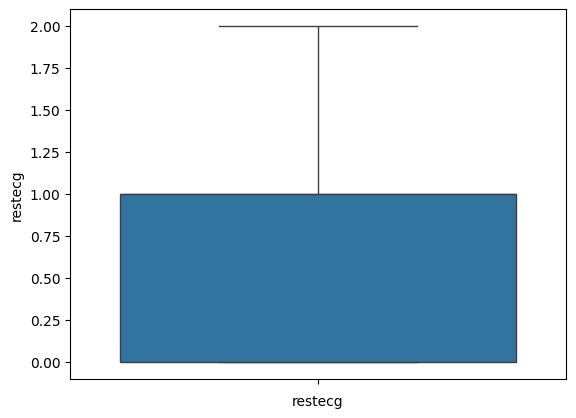

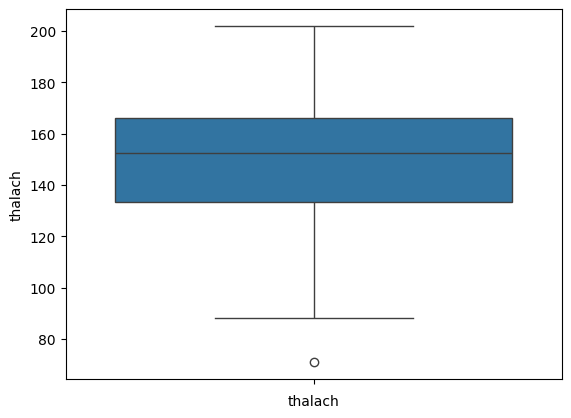

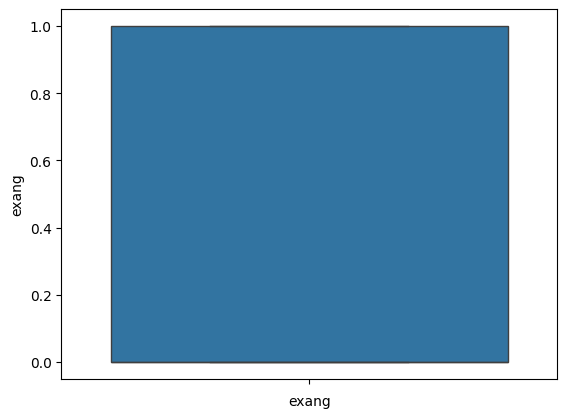

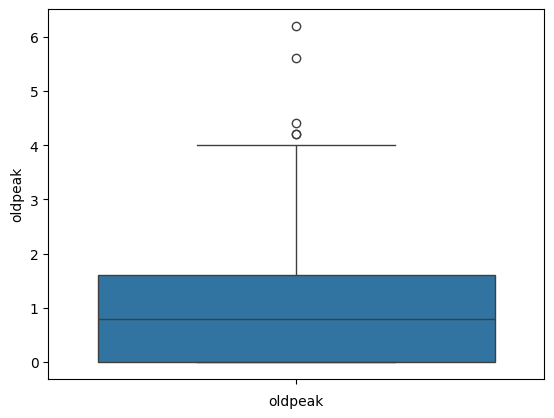

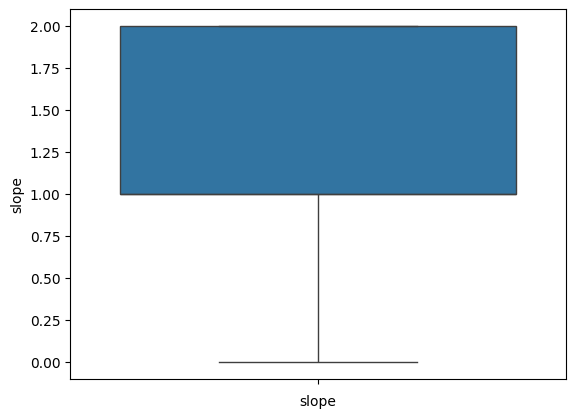

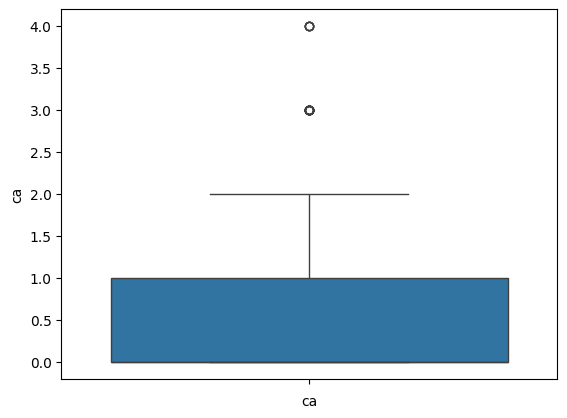

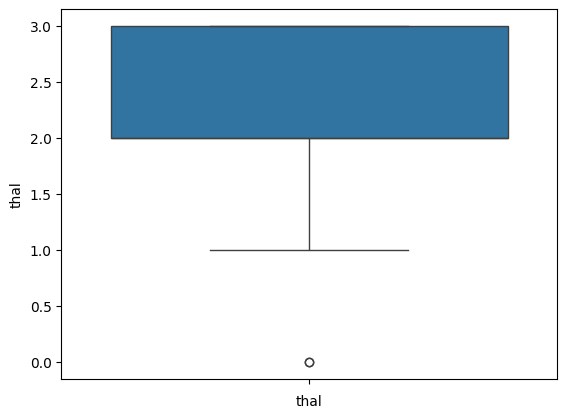

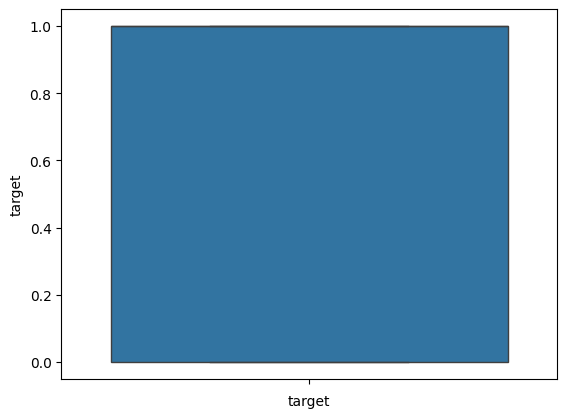

In [ ]:
# check for outliers
for col in df.columns:
  if df[col].dtype != "object":
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.show()

**There are some outliers in the dataset, but outliers will not be removed because:**

**1. Dataset is real patients information**

**2. Tree algorithms don't have much impact with outliers**

# **Model Building**

In [ ]:
x = df.iloc[:, :-1]
y = df["target"]

In [ ]:
x # independent variables

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y # dependent variable

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [ ]:
# split train test data
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train # Training questions

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2


In [ ]:
x_test #Testing questions

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2


In [ ]:
y_train #Training answers

,target
132,1
203,0
197,0
75,1
177,0
...,...
189,0
71,1
106,1
271,0


In [ ]:
y_test # Testing answer

,target
180,0
229,0
111,1
247,0
60,1
...,...
250,0
104,1
300,0
194,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
# Train the model
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
# Test the model
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
# Evaluate the model
from sklearn.metrics import *

In [ ]:
# accuracy score
accuracy_score(y_test,y_pred)*100

78.68852459016394

In [ ]:
# confusion matrix
confusion_matrix(y_test,y_pred)

array([[25,  4],
       [ 9, 23]])

In [ ]:
# precision score
precision_score(y_test,y_pred)

0.8518518518518519

In [ ]:
# recall
recall_score(y_test,y_pred)

0.71875

In [ ]:
from sklearn import tree

[Text(0.5877659574468085, 0.9583333333333334, 'x[12] <= 2.5\ngini = 0.495\nsamples = 241\nvalue = [109, 132]'),
 Text(0.3404255319148936, 0.875, 'x[11] <= 0.5\ngini = 0.382\nsamples = 148\nvalue = [38, 110]'),
 Text(0.464095744680851, 0.9166666666666667, 'True  '),
 Text(0.2127659574468085, 0.7916666666666666, 'x[9] <= 1.7\ngini = 0.208\nsamples = 102\nvalue = [12, 90]'),
 Text(0.1276595744680851, 0.7083333333333334, 'x[0] <= 58.5\ngini = 0.139\nsamples = 93\nvalue = [7, 86]'),
 Text(0.06382978723404255, 0.625, 'x[3] <= 109.0\ngini = 0.028\nsamples = 71\nvalue = [1, 70]'),
 Text(0.0425531914893617, 0.5416666666666666, 'x[1] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.02127659574468085, 0.4583333333333333, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.06382978723404255, 0.4583333333333333, 'x[8] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.0425531914893617, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.0851063829787234, 0.375, 'gini = 0.

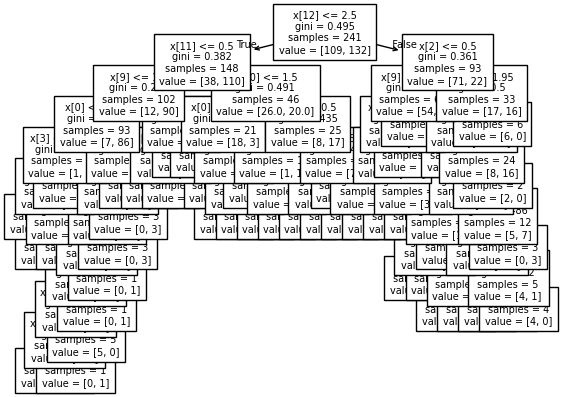

In [ ]:
tree.plot_tree(model,fontsize=7)

In [ ]:
# check tree depth
model.get_depth()

11

In [ ]:
# Calculate training and test accuracy to check for over/under fitting
train_score = model.score(x_train,y_train)
test_score = model.score(x_test,y_test)
print(f"Training Accuracy: {train_score:.2f}")
print(f"Testing Accuracy: {test_score:.2f}")

Training Accuracy: 1.00
Testing Accuracy: 0.79


**Model shows a Training accuracy of 100% and Testing accuracy 79%.**

**This significant difference of 100% vs 79% is a strong indicator of overfiiting.**

In [ ]:
# iterate through different max_depth values to find a better balance between training and testing accuracy
depth=[1,2,3,4,5,6,7,8,9,10,11,12,13]
for i in depth:
  model1 = DecisionTreeClassifier(max_depth=i,random_state=42)
  model1.fit(x_train,y_train)
  y_pred1=model1.predict(x_test)
  acc=accuracy_score(y_test,y_pred1)
  print(f"Max Depth: {i}, Accuracy: {acc}")

Max Depth: 1, Accuracy: 0.7213114754098361
Max Depth: 2, Accuracy: 0.7377049180327869
Max Depth: 3, Accuracy: 0.7868852459016393
Max Depth: 4, Accuracy: 0.8032786885245902
Max Depth: 5, Accuracy: 0.8032786885245902
Max Depth: 6, Accuracy: 0.7704918032786885
Max Depth: 7, Accuracy: 0.7704918032786885
Max Depth: 8, Accuracy: 0.7868852459016393
Max Depth: 9, Accuracy: 0.7704918032786885
Max Depth: 10, Accuracy: 0.7868852459016393
Max Depth: 11, Accuracy: 0.7704918032786885
Max Depth: 12, Accuracy: 0.7704918032786885
Max Depth: 13, Accuracy: 0.7704918032786885


**Depth 4 and 5 has the best accuracy**

**To reduce overfiiting due to tree depth we run model using depth 4 compared to inintial model depth 11**

In [ ]:
# Train model using max_depth 4
model = DecisionTreeClassifier(max_depth=4)

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
# test model
y_pred=model.predict(x_test)

In [ ]:
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
# confirm  model evaluation
accuracy_score(y_test,y_pred)*100

80.32786885245902

In [ ]:
# Re calc training and testing accuracy and check model fitting
train_score = model.score(x_train,y_train)
test_score = model.score(x_test,y_test)
print(f"Training Accuracy: {train_score:.2f}")
print(f"Testing Accuracy: {test_score:.2f}")
if train_score > test_score + 0.1:
        print("Warning: Model is likely Overfitting!")
elif test_score > train_score + 0.1:
        print("Warning: Model is likely Underfitting!")
else:
        print("Model is performing well!")

Training Accuracy: 0.88
Testing Accuracy: 0.80
Model is performing well!


In [ ]:
def predict_heart_disease():
  print("Please enter the following information to predict heart disease:")

  # ask user to enter all these values of independent variables
  age = int(input("Age: "))
  sex = int(input("Sex: "))
  cp = int(input("Chest Pain Level: "))
  trestbps = int(input("Blood Pressure in resting condition: "))
  chol = int(input("Cholestrol Level: "))
  fbs = int(input("Fasting Blood Sugar Level: "))
  restecg = int(input("ECG level at resting condition: "))
  thalach = int(input("Maximum Heart Rate Achieved: "))
  exang = int(input("Exercise Induce Angina: "))
  oldpeak = float(input("ECG Change during exercise from resting: "))
  slope = int(input("Slope of ECG: "))
  ca = int(input("Number of major blood vessels coloured by fluroscopy: "))
  thal = int(input("Blood disorder that can damage your heart: "))

  # create a dataframe to pass your model as independent variable
  input_data = pd.DataFrame({
      "age": [age],
      "sex": [sex],
      "cp": [cp],
      "trestbps": [trestbps],
      "chol": [chol],
      "fbs": [fbs],
      "restecg": [restecg],
      "thalach":[thalach],
      "exang":[exang],
      "oldpeak":[oldpeak],
      "slope":[slope],
      "ca":[ca],
      "thal":[thal]
  })
  # predict heart disease by passing dataframe
  prediction = model.predict(input_data)

  # print the predicted value
  print("Heart disease prediction - 1 means Yes, 0 means No:", prediction)

predict_heart_disease()


Please enter the following information to predict heart disease:
Age: 63
Sex: 1
Chest Pain Level: 3
Blood Pressure in resting condition: 145
Cholestrol Level: 233
Fasting Blood Sugar Level: 1
ECG level at resting condition: 0
Maximum Heart Rate Achieved: 150
Exercise Induce Angina: 0
ECG Change during exercise from resting: 2.3
Slope of ECG: 0
Number of major blood vessels coloured by fluroscopy: 0
Blood disorder that can damage your heart: 1
Heart disease prediction - 1 means Yes, 0 means No: [1]
